# Electric Vehicle Sales Analysis

**Name:** Sakshi Vijay Chaudhari  
**College:** Jayawantrao Sawant College of Engineering, Hadapsar, Pune  
**Internship:** ShadowFox  
**Domain:** Data Science  

## Project Overview
The objective of this project is to conduct an advanced exploratory data
analysis (EDA) on electric vehicle (EV) sales data. The analysis focuses
on understanding how vehicle specifications such as battery capacity,
driving range, price, and autonomous features influence sales
performance.

Electric vehicles are central to sustainable transportation, and
analyzing their sales trends provides insights for manufacturers,
policymakers, and consumers.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use("default")
sns.set_context("notebook")


In [3]:
# Load the dataset
# Load the dataset from Excel file
file_path = r"C:\Users\Sakshi\OneDrive\Desktop\SHADOWFOX\TASK 3\archive\electric_vehicles_dataset.xlsx"

df = pd.read_excel(file_path)
df.head()



,Vehicle_ID,Manufacturer,Model,Year,Battery_Type,Battery_Capacity_kWh,Range_km,Charging_Type,Charge_Time_hr,Price_USD,Color,Country_of_Manufacture,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
0,1,Acura,ZDX (with GM Ultium),2015,Lithium-titanate,55.8,214,CHAdeMO,9.0,111203.94,Matte White,UK,0.0,NaN,5.0,19726,3
1,2,Lamborghini,Revuelto (PHEV),2025,Lithium-titanate,90.8,212,Vehicle-to-Home (V2H),7.3,127131.65,White,Netherlands,2.0,0.0,4.0,3349,3
2,3,NIO,ET7,2020,Calcium-ion,64.7,235,Level 2 Charging,8.9,94347.37,Beige,UK,5.0,0.0,5.0,6300,5
3,4,Audi,e-tron,2025,Lithium-iron phosphate,120.5,140,Ultra-Fast Charging (350 kW+),10.5,75615.15,Sunset Orange,Argentina,2.0,0.0,5.0,2339,5
4,5,Acura,ZDX (with GM Ultium),2023,Lithium-titanate,51.8,336,Plug-in Hydrogen Refueling,3.6,141046.94,Ice Silver,United Arab Emirates,2.0,0.0,3.0,1051,4


## Dataset Exploration (EDA)
Understanding the structure, size, and basic characteristics of the dataset.


In [4]:
# Dataset shape
df.shape


(3022, 17)

In [5]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3022 entries, 0 to 3021
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              3022 non-null   int64  
 1   Manufacturer            3022 non-null   object 
 2   Model                   3022 non-null   object 
 3   Year                    3022 non-null   int64  
 4   Battery_Type            3022 non-null   object 
 5   Battery_Capacity_kWh    3022 non-null   float64
 6   Range_km                3022 non-null   int64  
 7   Charging_Type           3022 non-null   object 
 8   Charge_Time_hr          3022 non-null   float64
 9   Price_USD               3022 non-null   float64
 10  Color                   3022 non-null   object 
 11  Country_of_Manufacture  3022 non-null   object 
 12  Autonomous_Level        2580 non-null   float64
 13  CO2_Emissions_g_per_km  2430 non-null   float64
 14  Safety_Rating           2685 non-null   

In [6]:
# Statistical summary
df.describe()


,Vehicle_ID,Year,Battery_Capacity_kWh,Range_km,Charge_Time_hr,Price_USD,Autonomous_Level,CO2_Emissions_g_per_km,Safety_Rating,Units_Sold_2024,Warranty_Years
count,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,2580.000000,2430.0,2685.000000,3022.000000,3022.000000
mean,1511.500000,2020.019523,84.314692,349.901059,6.212045,90611.906760,2.519380,0.0,3.995158,10207.072799,3.997353
std,872.520582,3.132083,37.210461,145.406139,3.350597,34654.533838,1.713712,0.0,0.819594,5771.619003,0.821746
min,1.000000,2015.000000,20.000000,100.000000,0.500000,30014.460000,0.000000,0.0,3.000000,6.000000,3.000000
25%,756.250000,2017.000000,52.425000,222.000000,3.300000,61257.390000,1.000000,0.0,3.000000,5145.500000,3.000000
50%,1511.500000,2020.000000,83.600000,347.000000,6.200000,90929.705000,3.000000,0.0,4.000000,10350.000000,4.000000
75%,2266.750000,2023.000000,115.800000,478.000000,9.100000,120199.842500,4.000000,0.0,5.000000,15128.000000,5.000000
max,3022.000000,2025.000000,150.000000,600.000000,12.000000,149978.530000,5.000000,0.0,5.000000,19996.000000,5.000000


In [7]:
# Missing values
df.isnull().sum()


Vehicle_ID                  0
Manufacturer                0
Model                       0
Year                        0
Battery_Type                0
Battery_Capacity_kWh        0
Range_km                    0
Charging_Type               0
Charge_Time_hr              0
Price_USD                   0
Color                       0
Country_of_Manufacture      0
Autonomous_Level          442
CO2_Emissions_g_per_km    592
Safety_Rating             337
Units_Sold_2024             0
Warranty_Years              0
dtype: int64

## Data Cleaning
Cleaning the dataset by handling duplicates and missing values to ensure
data consistency and reliability.


In [10]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing numerical values using median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Handle missing categorical values using mode
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


## Feature Selection
Selecting relevant variables for analysis.


In [13]:
print(df.columns.tolist())



['Vehicle_ID', 'Manufacturer', 'Model', 'Year', 'Battery_Type', 'Battery_Capacity_kWh', 'Range_km', 'Charging_Type', 'Charge_Time_hr', 'Price_USD', 'Color', 'Country_of_Manufacture', 'Autonomous_Level', 'CO2_Emissions_g_per_km', 'Safety_Rating', 'Units_Sold_2024', 'Warranty_Years']


In [17]:
df = df[['Manufacturer', 'Model Year', 'Battery Capacity (kWh)',
         'Range (km)', 'Price (USD)', 'Autonomous Level',
         'Units Sold 2024']]

df.head()


,Manufacturer,Model Year,Battery Capacity (kWh),Range (km),Price (USD),Autonomous Level,Units Sold 2024
0,Acura,2015,55.8,214,111203.94,0.0,19726
1,Lamborghini,2025,90.8,212,127131.65,2.0,3349
2,NIO,2020,64.7,235,94347.37,5.0,6300
3,Audi,2025,120.5,140,75615.15,2.0,2339
4,Acura,2023,51.8,336,141046.94,2.0,1051


## Research Questions
1. How do battery capacity, driving range, price, and autonomous features
   influence EV sales?
2. Which manufacturers and model years contribute most to EV adoption?


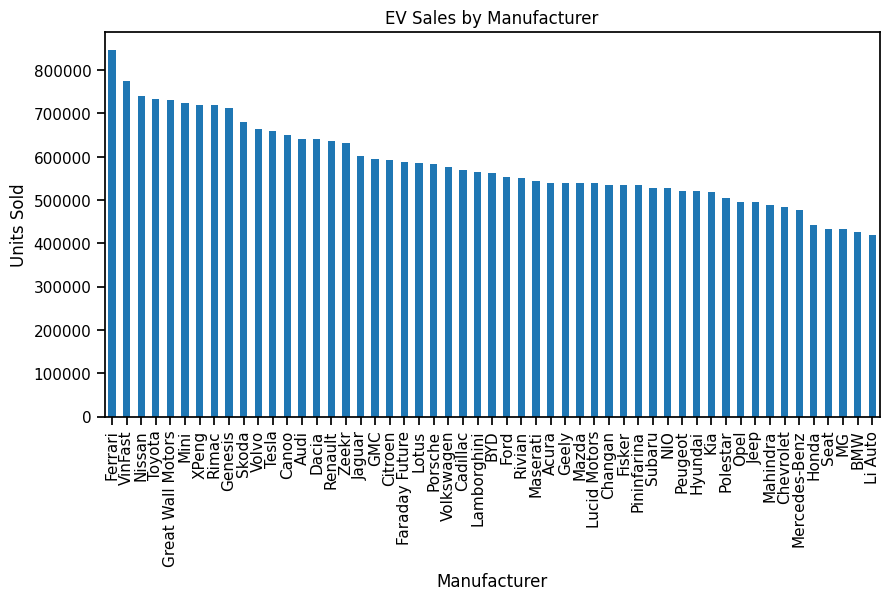

In [19]:
# Manufacturer-wise sales
manufacturer_sales = (
    df.groupby('Manufacturer')['Units Sold 2024']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
manufacturer_sales.plot(kind='bar')
plt.title("EV Sales by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Units Sold")
plt.show()


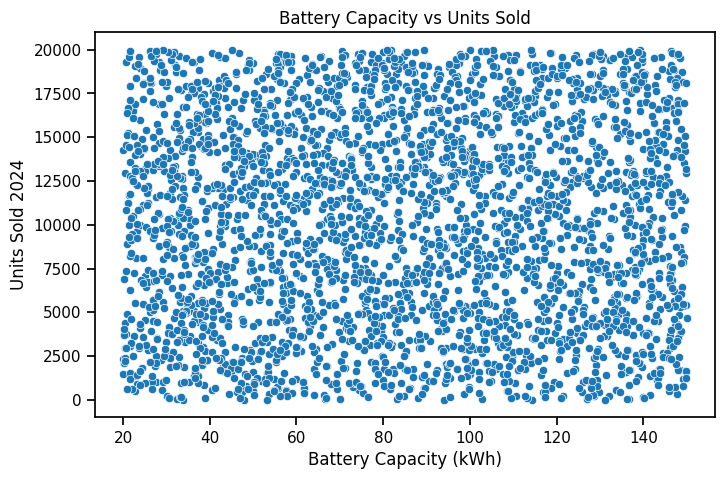

In [21]:
# Battery Capacity vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Battery Capacity (kWh)',
    y='Units Sold 2024',
    data=df
)
plt.title("Battery Capacity vs Units Sold")
plt.show()


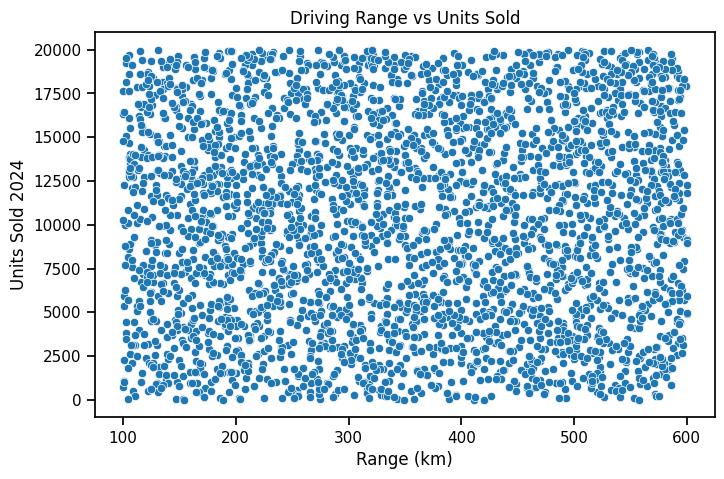

In [22]:
# Driving Range vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Range (km)',
    y='Units Sold 2024',
    data=df
)
plt.title("Driving Range vs Units Sold")
plt.show()


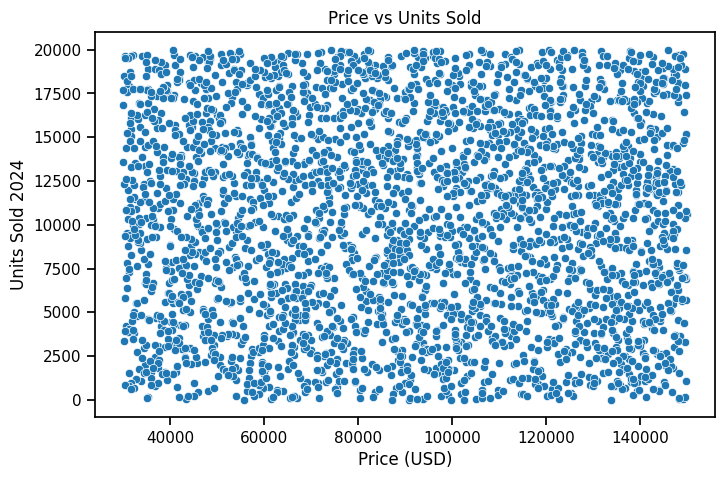

In [23]:
# Price vs Sales
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Price (USD)',
    y='Units Sold 2024',
    data=df
)
plt.title("Price vs Units Sold")
plt.show()


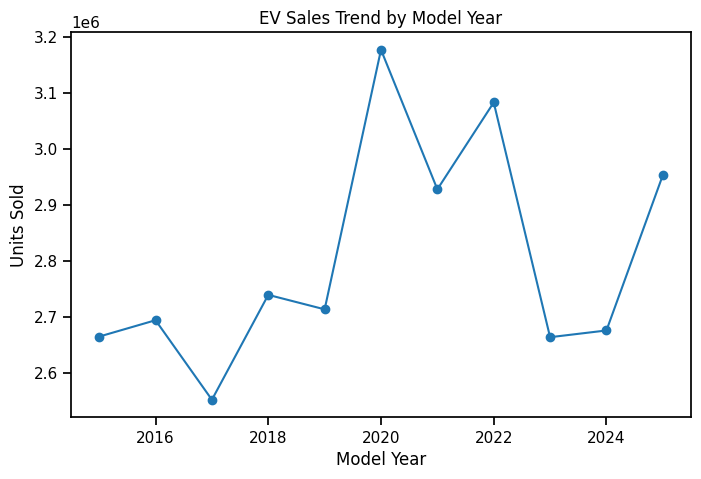

In [24]:
# Sales trend by model year
yearly_sales = df.groupby('Model Year')['Units Sold 2024'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(marker='o')
plt.title("EV Sales Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Units Sold")
plt.show()


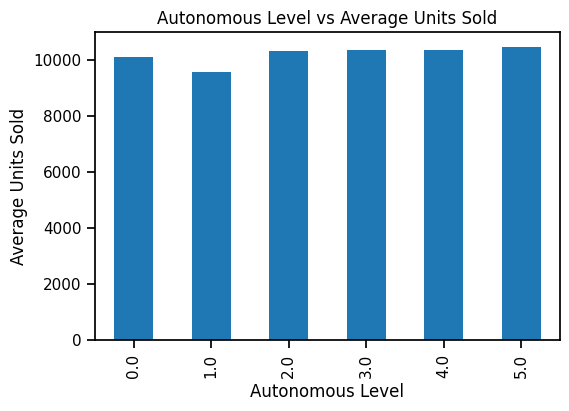

In [25]:
# Autonomous Level vs Average Sales
auto_sales = df.groupby('Autonomous Level')['Units Sold 2024'].mean()

plt.figure(figsize=(6,4))
auto_sales.plot(kind='bar')
plt.title("Autonomous Level vs Average Units Sold")
plt.xlabel("Autonomous Level")
plt.ylabel("Average Units Sold")
plt.show()


## Correlation Analysis
Analyzing relationships between numerical variables.


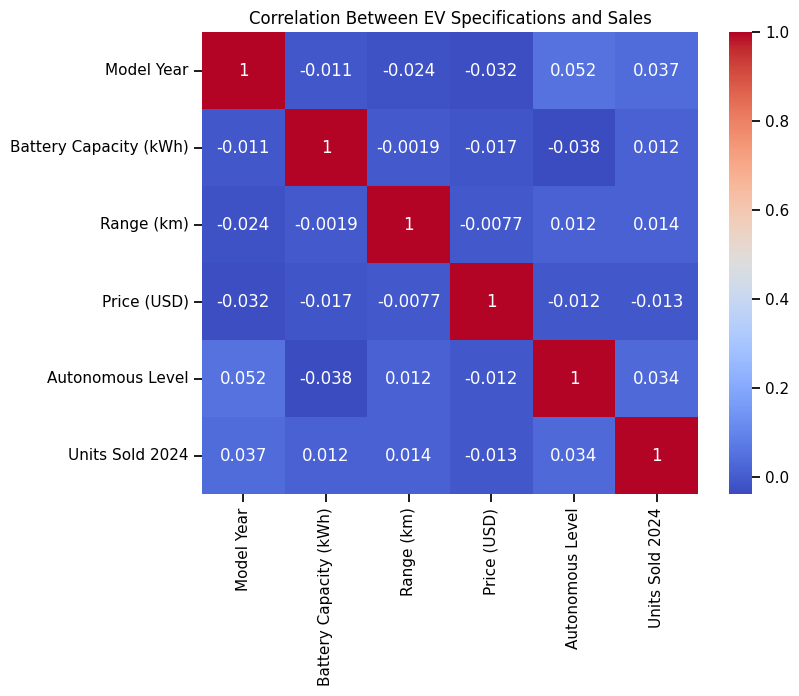

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Between EV Specifications and Sales")
plt.show()


## Key Findings
- EV sales are higher for newer model years.
- Vehicles with higher battery capacity and longer driving range
  generally achieve higher sales.
- Moderately priced EVs outperform extremely expensive models.
- Manufacturer reputation significantly impacts sales.
- Autonomous features alone do not guarantee higher adoption.


## Conclusion
This project demonstrates the effectiveness of exploratory data analysis
and visualization in extracting insights from electric vehicle sales data.
The analysis highlights key technical and economic factors influencing EV
adoption and can support strategic decisions by manufacturers and
policymakers.
